In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [44]:
data = pd.read_csv("Merged_Data.csv")
data.head(5)

,period,plantCode,plantName,fuel2002,fuelTypeDescription,state,stateDescription,primeMover,total-consumption,total-consumption-units,...,Nuclear_MW,Crude_MW,Solar_MW,Wind_MW,Other_MW,Source,Period,Longitude,Latitude,0
0,2004-08-01,54903,Adrian Energy Associates LLC,NG,Natural Gas,MI,Michigan,ALL,0.0,MMBtu per Mcf,...,0.0,0.0,0.0,0.0,0.0,"EIA-860, EIA-860M and EIA-923",202305.0,-83.9929,41.891,NaN
1,2004-08-01,54903,Adrian Energy Associates LLC,NG,Natural Gas,MI,Michigan,IC,0.0,MMBtu per Mcf,...,0.0,0.0,0.0,0.0,0.0,"EIA-860, EIA-860M and EIA-923",202305.0,-83.9929,41.891,NaN
2,2002-11-01,54903,Adrian Energy Associates LLC,NG,Natural Gas,MI,Michigan,,589.4,MMBtu per Mcf,...,0.0,0.0,0.0,0.0,0.0,"EIA-860, EIA-860M and EIA-923",202305.0,-83.9929,41.891,NaN
3,2002-11-01,54903,Adrian Energy Associates LLC,NG,Natural Gas,MI,Michigan,ALL,589.4,MMBtu per Mcf,...,0.0,0.0,0.0,0.0,0.0,"EIA-860, EIA-860M and EIA-923",202305.0,-83.9929,41.891,NaN
4,2004-07-01,54903,Adrian Energy Associates LLC,NG,Natural Gas,MI,Michigan,ALL,0.0,MMBtu per Mcf,...,0.0,0.0,0.0,0.0,0.0,"EIA-860, EIA-860M and EIA-923",202305.0,-83.9929,41.891,NaN


In [45]:

data['period'] = pd.to_datetime(data['period'])
data.set_index('period', inplace=True)

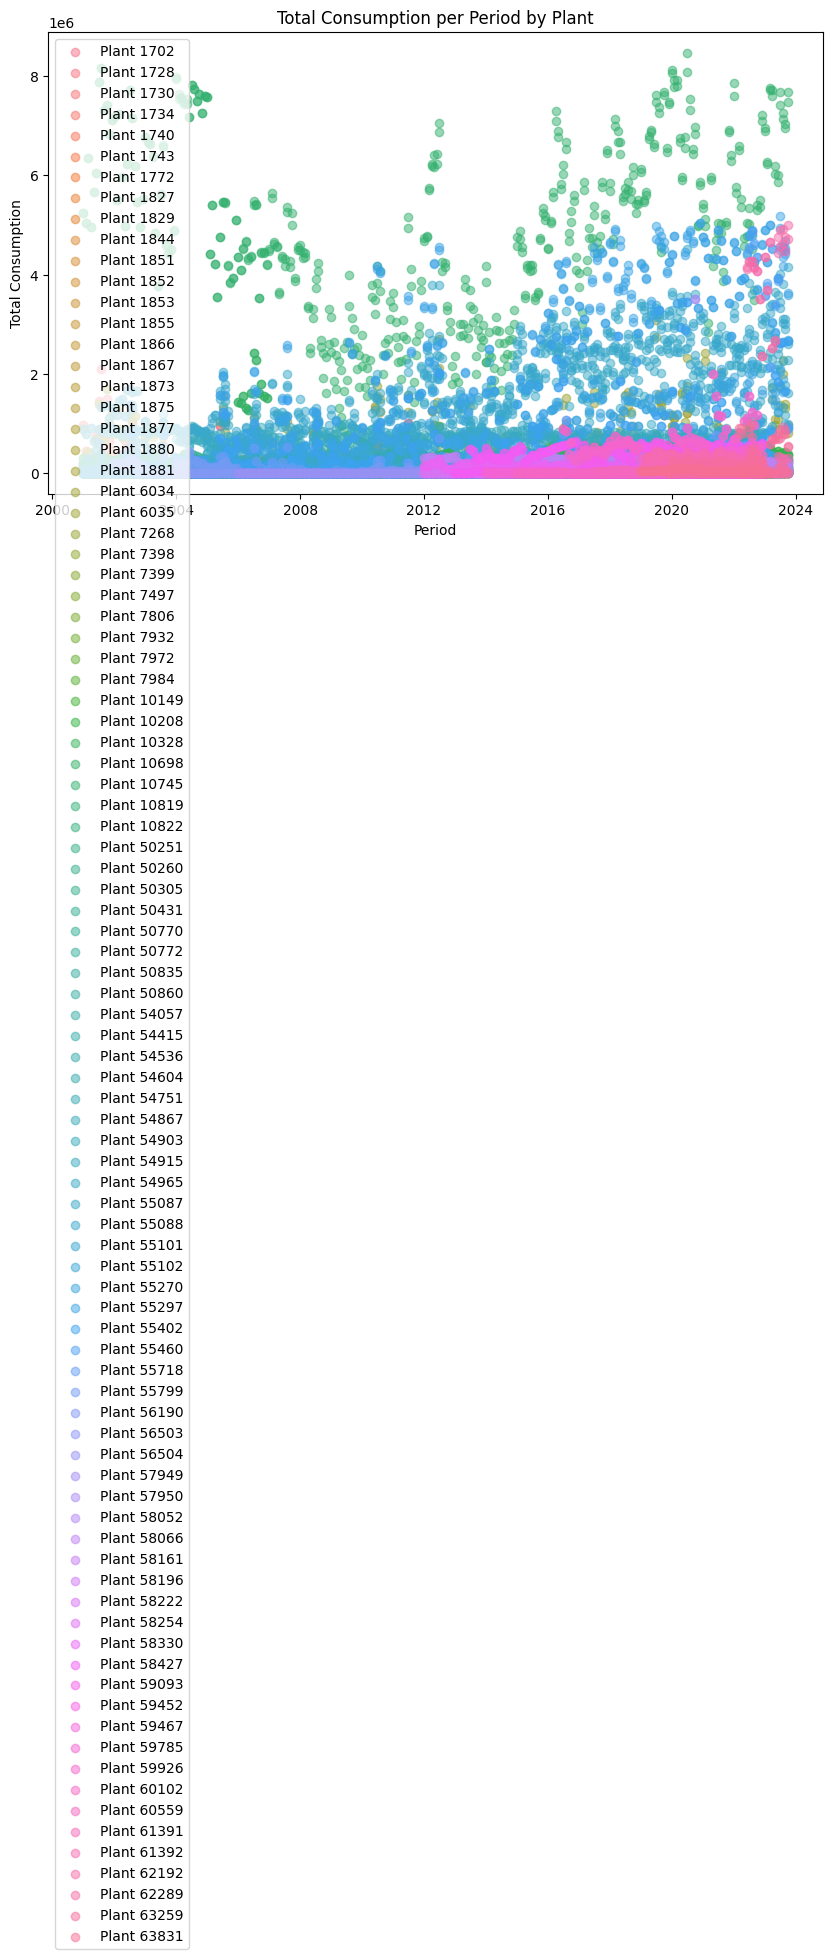

In [46]:
# Selecting relevant columns for scatterplot
scatter_data = data[['plantCode', 'total-consumption']]

# Group by 'plantCode' and sum the 'total-consumption' for each plant
grouped_data = scatter_data.groupby('plantCode')['total-consumption'].sum()

# Create a color palette with a unique color for each plant
palette = sns.color_palette("husl", n_colors=len(grouped_data))

# Scatterplot with different colors for each plant
plt.figure(figsize=(10, 6))
for plant, color in zip(grouped_data.index, palette):
    plant_data = scatter_data[scatter_data['plantCode'] == plant]
    plt.scatter(plant_data.index, plant_data['total-consumption'], label=f'Plant {plant}', color=color, alpha=0.5)

plt.title('Total Consumption per Period by Plant')
plt.xlabel('Period')
plt.ylabel('Total Consumption')
plt.legend()
plt.show()
